# COGS 109 Final Project Report
### Molly Varozza, Daniil Magaril, Amy Li, Jason Lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
data = pd.read_csv("imports-85.csv")

print(data.shape)
print(type(data))
print(data)

In [10]:
# Duration on product-related page vs whether they purchased something or not 
cityMPG = data['23']
engineSize = data['16']

cMPG_train, cMPG_test, eS_train, eS_test = train_test_split(cityMPG, engineSize, test_size = .2)
'''
X,Y =[],[]
for i in range(len(revenue)):
    if(productRelatedDuration[i]<20000):
        X.append(revenue[i])
        Y.append(productRelatedDuration[i])
        '''


'\nX,Y =[],[]\nfor i in range(len(revenue)):\n    if(productRelatedDuration[i]<20000):\n        X.append(revenue[i])\n        Y.append(productRelatedDuration[i])\n        '

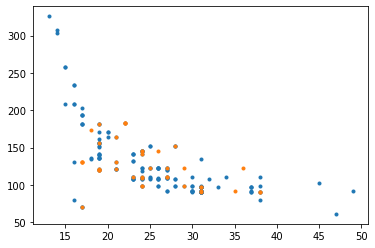

In [11]:
X = cMPG_train
Y = eS_train

#initial data plot
plt.plot(X, Y, '.')
plt.plot(cMPG_test, eS_test, '.')

In [5]:
#Create matrices for first and second order models
A1 = np.column_stack((np.ones((X.shape)), X))
w1 = np.linalg.lstsq( A1, Y, rcond = None)[0]

A2 = np.column_stack((np.ones((X.shape)), X, np.square(X)))
w2 = np.linalg.lstsq( A2, Y, rcond = None)[0]

In [6]:
#Use matrices generated above to create models
y_pred1 = np.matmul(A1, w1)
y_pred2 = np.matmul(A2, w2)

xRange = np.linspace(min(X), max(X))
ones = np.ones(len(xRange))
squares = np.square(xRange)

A1 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A1, w1)

A2 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A2, w2)

# y = A + B * log(x)
A3 = np.polyfit(np.log(xRange), Y, 1)



TypeError: expected x and y to have same length

NameError: name 'A3' is not defined

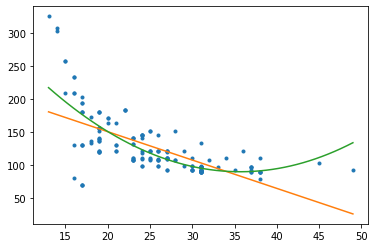

In [7]:
#Plot data alongside created models
plt.plot(X,Y, '.')

linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)
temp, = plt.plot(xRange, A3[0]+A3[1]*xRange)

plt.legend([linModel, quadModel], ["First Order Model", "Second Order Model"])

In [8]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred1 - Y))
SSEQuad = sum(np.square(y_pred2 - Y))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad)

Linear SSE: 182869.0322101476 
Quadratic SSE: 145294.9674788326


In [14]:
# cityMPG vs curb weight
cityMPG = data['23']
curbWeight = data['12']

cMPG1_train, cMPG1_test, cw_train, cw_test = train_test_split(cityMPG, curbWeight, test_size = .2)

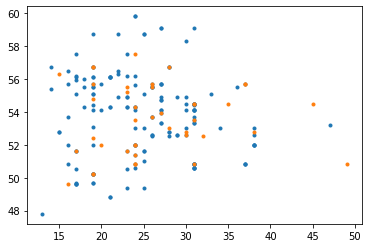

In [15]:
X1 = cMPG1_train
Y1 = cw_train

#initial data plot
plt.plot(X1, Y1, '.')
plt.plot(cMPG1_test, cw_test, '.')

In [16]:
#Create matrices for first and second order models
A3 = np.column_stack((np.ones((X1.shape)), X1))
W3 = np.linalg.lstsq( A3, Y1, rcond = None)[0]

A4 = np.column_stack((np.ones((X1.shape)), X1, np.square(X1)))
W4 = np.linalg.lstsq( A4, Y1, rcond = None)[0]

In [24]:
#Use matrices generated above to create models
y1_pred1 = np.matmul(A3, W3)
y1_pred2 = np.matmul(A4, W4)

x1Range = np.linspace(min(X1), max(X1))
ones1 = np.ones(len(x1Range))
squares1 = np.square(x1Range)

A3 = np.column_stack((ones1, x1Range))
y1plot1 = np.matmul(A3, W3)

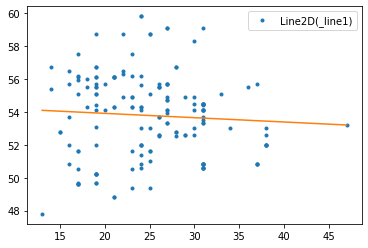

In [25]:
#Plot data alongside created models
plt.plot(X1,Y1, '.')

linModel = plt.plot(x1Range, y1plot1)

plt.legend(linModel)